In [ ]:
pip install ultralytics opencv-python torch

In [29]:
#! pip install inference_sdk
image_path = '/content/drive/MyDrive/Detection-of-violence/images/not gun/pngtree-sea-beach-natural-scenery-background-photography-image_16332956.jpg'



from inference_sdk import InferenceHTTPClient

CLIENT = InferenceHTTPClient(
    api_url="https://detect.roboflow.com",
    api_key="mmAlw6mbmqi39y5wLaQs"
)

result = CLIENT.infer(image_path, model_id="e_commerce_gun_detection/5")
result

{'inference_id': 'fd8fc93a-0492-4eda-b98f-7f27b05e2aa9',
 'time': 0.04631481100022938,
 'image': {'width': 960, 'height': 686},
 'predictions': []}

{'x': 288.5, 'y': 266.0, 'width': 497.0, 'height': 154.0, 'confidence': 0.9063432812690735, 'class': 'weapon', 'class_id': 0, 'detection_id': '807f7fb2-6b67-4195-b468-9f2ff63159f4', 'check': True}
{'x': 319.0, 'y': 96.0, 'width': 570.0, 'height': 146.0, 'confidence': 0.9060641527175903, 'class': 'weapon', 'class_id': 0, 'detection_id': '3d191cb5-2f1e-4f71-9bdd-3a94dd45ed92', 'check': True}


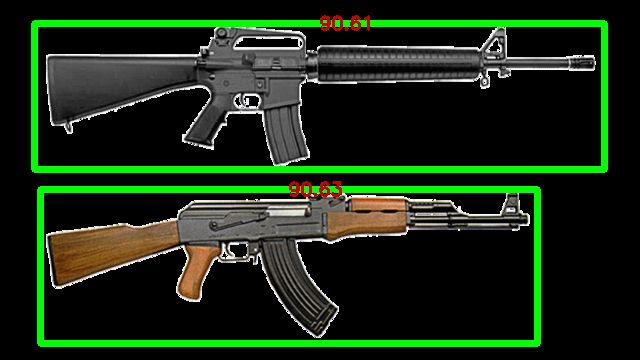

In [65]:
import cv2
from google.colab.patches import cv2_imshow
# ! pip install inference_sdk
from inference_sdk import InferenceHTTPClient

image_path = '/content/drive/MyDrive/Detection-of-violence/images/gun/M16_and_AK-47_comparison.png'
image = cv2.imread(image_path)
check_gun = True

from inference_sdk import InferenceHTTPClient

CLIENT = InferenceHTTPClient(
    api_url="https://detect.roboflow.com",
    api_key="mmAlw6mbmqi39y5wLaQs"
)

result = CLIENT.infer(image_path, model_id="e_commerce_gun_detection/5")

if len(result["predictions"])==0:
  print('no gun found')
  check_gun = False
else:
  for gun in result["predictions"]:
    if gun["confidence"]<0.5:
      gun['check'] = False
    else:
      gun['check'] = True






if check_gun == True:
  for rec in result["predictions"]:
    if rec['check'] == True:
      print(rec)
      x,y = (int(rec["x"]) - int(rec["width"])//2 , int(rec["y"])-int(rec["height"])//2)
      width , hieght = (int(rec["width"])+x, int(rec["height"])+y)
      cv2.rectangle(image, (x,y), (width, hieght), (0, 255, 0), 6)
      cv2.putText(image, f'{(rec["confidence"]*100):.2f}', (int(rec['x']), y+6), cv2.FONT_HERSHEY_SIMPLEX, 0.6, (0, 0, 200), 2)


cv2_imshow(image)
cv2.waitKey(0)
cv2.destroyAllWindows()